#**Prodigy infotech** Machine learning Task - 3

##**Statement**:Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset.

###Uploading dataset from kaggle

In [1]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:13<00:00, 107MB/s] 
100% 1.06G/1.06G [00:13<00:00, 83.7MB/s]


###Zip file extracting

In [2]:
from zipfile import ZipFile
with ZipFile('/content/dogs-vs-cats.zip','r') as zipObj:
  zipObj.extractall('/content/test')

###Import libraries

In [3]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

###Dataset loading

In [4]:
# Load dataset paths
def load_images_from_folder(folder, label, image_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, image_size)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = img.flatten()  # Flatten the image
            images.append(img)
            labels.append(label)
    return images, labels

In [5]:
# Paths to the dataset folders
cat_folder = '/content/test/dogs_vs_cats/test/cats'
dog_folder = '/content/test/dogs_vs_cats/test/dogs'

In [6]:
# Load cat images
cat_images, cat_labels = load_images_from_folder(cat_folder, label=0)  # label 0 for cats
# Load dog images
dog_images, dog_labels = load_images_from_folder(dog_folder, label=1)  # label 1 for dogs

###Data preprocessing

In [7]:
# Combine cat and dog images
X = np.array(cat_images + dog_images)
y = np.array(cat_labels + dog_labels)

###Model train

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Initialize the SVM model
svm = SVC(kernel='rbf',C=1.0,verbose=True,random_state=42)

In [11]:
# Train the model
svm.fit(X_train, y_train)

[LibSVM]

SVC(random_state=42, verbose=True)

In [12]:
# Predict on the test set
y_pred = svm.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,

###Data evaluation

In [14]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
cm = confusion_matrix(y_test,y_pred)
print('Confusin Matrix:\n',cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 62.30%
Confusin Matrix:
 [[305 195]
 [182 318]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.61      0.62       500
           1       0.62      0.64      0.63       500

    accuracy                           0.62      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.62      0.62      0.62      1000



###Data visualisation

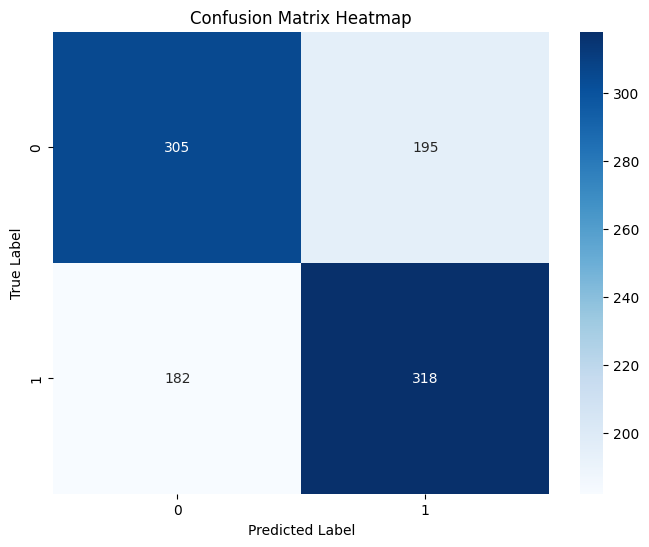

In [16]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# Adding labels
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

In [33]:
def preprocess_image(image_path, img_size=(64, 64)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, img_size)
    img = img.flatten()
    img = scaler.transform([img])  # Standardize the image
    return img

new_image_path = '/content/th.jpg'

# Preprocess the new image
new_image = preprocess_image(new_image_path)

# Predict the class for the new image using the preprocessed data
prediction = svm.predict(new_image)
print(f'Predicted class: {"Cat" if prediction[0] == 0 else "Dog"}')

Predicted class: Cat


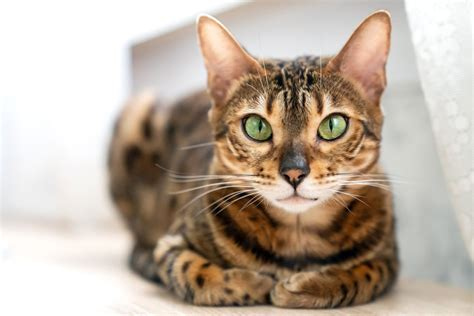

In [34]:
from IPython.display import Image
Image("/content/th.jpg")